# Linear Regression Template Lite
1. Preprocessing
    1. Import lib
    1. Import dataset
    1. EDA - Exploratory Data Analysis
    1. Separate features from target
    1. Split Train and Test sets (80/20)
    1. Cleaning
        1. Replace missing val 
        1. Standardize numerical features + One hot encode categorical variables
        1. Encode labels of y
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set
1. Evaluate model (R², adj R²)
1. Features importance


Penser à utiliser d'autres modèles de régression : 
* DecisionTreeRegressor()
* RandomForestRegressor()
* ...
* Voir https://scikit-learn.org/stable/supervised_learning.html


## Step 1 - Preprocessing
* Jusqu'à Step 2, on reprend les étapes 1 à 5 du `template preprocessing`

### Step 1.1 - Import libraries

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1.2 - Import dataset

In [2]:
df = pd.read_csv("99-assets/ML/salary_data.csv")
df.head() 

,Country,YearsExperience,Salary
0,France,1.1,39343.0
1,United-Kingdom,1.3,46205.0
2,France,1.5,37731.0
3,France,2.0,43525.0
4,Germany,2.2,39891.0


### Setp 1.3 - EDA - Exploratory Data Analysis

In [3]:
print(df.shape)                       # (#rows, #columns)

print()
print(df.describe(include="all")) # include non numerical info

print()
df.info()

print()
df["Country"].value_counts()


# Vérifier que le count est identique pour toutes les colonnes
# Attention on peut avoir le même nb de valeurs qui manquent partout
# Faut correler avec df.shape
# Vérifier les unités
# Les gammes de valeurs des données

# df.drop(["Country"], axis=1, inplace = True)
# df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# vérifier si il y a des lignes dupliquées
# duplicates = df[df.duplicated()]
# print("Duplicate Rows:", duplicates)
# df = df.drop_duplicates()

# df.value_counts()
# df["Country"].value_counts()/len(df)

# print(df[df['Embarked'].isna()])                                      # print lines with NaN
# df.isna().mean() * 100
# df.isna().sum() / len(df) * 100                                       # print nb of Nan as %
# isnull() = isna() mais isna() est plus récente

# Créer des combinaisons de variables
# df["debile"] = df["Salary"]/df["Age"]

# df.drop("debile", axis=1)

# corr_matrix = df.corr(numeric_only=True)
# print(corr_matrix)
# print()
# print(corr_matrix["Survived"].sort_values(ascending=False))

# chercher les outliers
# from scipy.stats import zscore
# z_scores = zscore(df)
# z_scores = np.abs(z_scores)
# outliers = (z_scores > 3).all(axis=1)

# chercher les outliers
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1 # interquartile range
# outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

#########################################################################
# Graphes
# _ = df.hist(bins=50)                                                  # affiche une matrice avec tous les histogrammes 
# df["Country"].hist()

# from pandas.plotting import scatter_matrix                            # affiche une matrice avec le graphes des correlation entre features 
# attributes = ["nom1", "nom2", "nom3"]
# scatter_matrix(housing[attribute], figsize=(10, 10))

# sns.catplot(data = df, x="Sex", y="Survived", kind="bar")
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
              #  s=housing["population"]/75, label="population",
              #  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10))
# _ = plt.legend()

#sns.histplot(df['Positive_Axillary_Nodes'], bins=15, kde=True, color='lightgreen') # kernel density estimate (kde=True) 
                                                                                    # smoothed probability density function

# sns.heatmap(df.corr(numeric_only=True));   

# attributes = ["Age", "Salary"]
# _ = scatter_matrix(df[attributes])

# Camembert
#marital_counts = df['Marital_Status'].value_counts()
#plt.figure(figsize=(10, 6))
#plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))

# Courbe cumulée
# plt.figure(figsize=(10, 6))
# sns.ecdfplot(df['Age_Group'], color='purple')

# Generate heatmap
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Plotting violin plots for selected features
# for feature in selected_features:
#     plt.figure(figsize=(8, 6))
#     sns.violinplot(x='Survival_Status', y=feature, data=df, hue='Survival_Status', palette='Blues', inner='quartile', legend=False)
#     plt.title(f'Violin Plot for {feature} by Survival Status')
#     plt.xlabel('Survival Status')
#     plt.ylabel(feature)
#     plt.show()

# sns.pairplot(df, hue='Survival_Status')

# plt.figure(figsize=(7, 6))
# sns.scatterplot(x='Tumor_Size', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='pastel')

# sns.jointplot(x='Age', y='Positive_Axillary_Nodes', data=df,color='lightblue')
# plt.show()

# sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
# plt.show()


(30, 3)

       Country  YearsExperience         Salary
count       30        30.000000      30.000000
unique       3              NaN            NaN
top     France              NaN            NaN
freq        12              NaN            NaN
mean       NaN         5.313333   76003.000000
std        NaN         2.837888   27414.429785
min        NaN         1.100000   37731.000000
25%        NaN         3.200000   56720.750000
50%        NaN         4.700000   65237.000000
75%        NaN         7.700000  100544.750000
max        NaN        10.500000  122391.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          30 non-null     object 
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), object(1)
memory usage: 852.0+ bytes



Country
France            12
United-Kingdom    12
Germany            6
Name: count, dtype: int64

Vérifier count, si il manque des valeurs etc.

### Step 1.4 - Separate Target from feature variables


In [4]:
features_list = ["Country", "YearsExperience"]
X = df.loc[:,features_list] # Create an X dataframe as a subset of df with the columns of features_list
y = df.loc[:,"Salary"]      # We set "Salary" as the target variable
# print(X.head())
# print(y.head())

### Step 1.4 - Train / Test split 

In [5]:
# pas de stratify 
# si stratify = y       # Allows you to stratify your sample. 
                        # Meaning, you will have the same proportion of categories in test and train set
# test_size=0.2 is completely arbitrary.  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)  
                                                    # No stratify because y is not a set of categories

### Step 1.5 - Cleaning 
1. Remplace missing values - SimpleImputer avec strategy='mean' pour valeurs numériques ou strategy='mode' si il manque des données catégorielles
1. Standardize numerical features + One hot encode categorical variables
1. If y is discrete => Encode labels of y

In [6]:
# num_features_idx va contenir les index des colonnes de type numérique 
# num_features_idx = [1] 
numeric_features = X.select_dtypes(exclude="object").columns.to_list()
numeric_features = X.columns.get_indexer(numeric_features)
# print (*num_features_idx)

# cat_features_idx va contenir les index des colonnes de type chaine 
# cat_features_idx = [0] 
categorical_features = X.select_dtypes(include="object").columns.to_list()
categorical_features = X.columns.get_indexer(categorical_features)
# print (*cat_features_idx)

# In this case, no need to Replace missing values
# imputer = SimpleImputer(strategy="mean")
# X_train.iloc[:,[1,2]] = imputer.fit_transform(X_train.iloc[:,[1,2]])
# categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

# Standardize numerical features + One hot encode categorical variables
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()                 # ! On ne fait pas drop="first"
# categorical_transformer = OneHotEncoder(drop='first')   # supprimer la 1ere catégorie

feature_encoder = ColumnTransformer(
  transformers=[
    ('cat', categorical_transformer, categorical_features),    
    ('num', numeric_transformer, numeric_features)
  ]
)

X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:])                                   # print first 5 rows (not using iloc since X_train is now a numpy array)
                                                        # ! X_train became a numpy array
                                                        # bob = pd.DataFrame(X_train, columns=["Code 1", "Code 2", "Code 3", "Years"])
                                                        # print(bob)

# In this case, no need to Encode labels of y 
# because it is a float value and not a category
# labelencoder = LabelEncoder()    
# y_train = labelencoder.fit_transform(y_train)

[[ 0.          0.          1.          1.75832984]
 [ 0.          0.          1.         -0.40973925]
 [ 0.          0.          1.          0.09356251]
 [ 1.          0.          0.          1.10016601]
 [ 0.          0.          1.         -0.83560996]]


## Step 2 - Build the model

### 2.1 Select and train a model

In [7]:
regressor = LinearRegression()
# Read the doc and feel free to replace LinearRegression() with one of these models
# Compare the R² score to keep the best 
# regressor = Ridge()
# regressor = Lasso()
# regressor = ElasticNet()
regressor.fit(X_train, y_train)                  # This steps is the actual training !

LinearRegression()

### 2.2 Apply model on train set

In [8]:
y_train_pred = regressor.predict(X_train)
# print(y_train_pred[:5])                         # print first 5 rows
                                                  # ! y_train became a numpy array

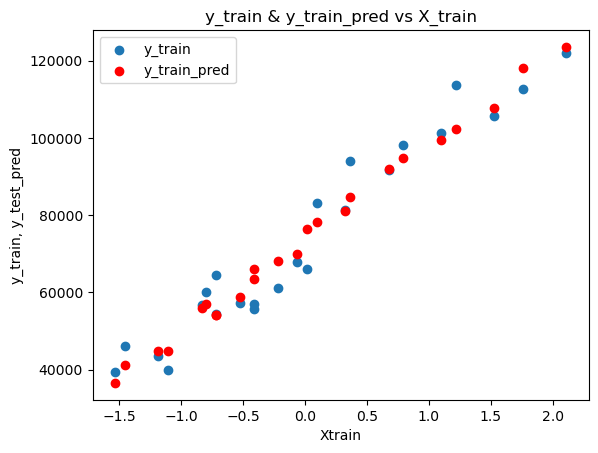

In [9]:

# ! On triche un peu là
# On affiche "y" uniquement en fonction de "Years Of experience" (X_train[:,3])
# On affiche pas "y" en fonctions des 4 features de X_train
fig, ax = plt.subplots()
ax.set_title("y_train & y_train_pred vs X_train")
ax.set_xlabel("Xtrain")
ax.set_ylabel("y_train, y_test_pred")


ax.scatter(x=X_train[:,3], y=y_train)
ax.scatter(x=X_train[:,3], y=y_train_pred, c="red")

ax.legend(('y_train', 'y_train_pred'))


### 2.3 Apply model on test set

In [10]:
# Process test set data
 

# 1.5 - No missing values => No imputer.transform...

# 1.5 - Encoding categorical features and standardizing numeric features
X_test = feature_encoder.transform(X_test)

# 1.5 - No need to encode y labels

In [11]:
# Predictions on test set
# cf 2.1 above
y_test_pred = regressor.predict(X_test)
# print(y_test_pred[:5])

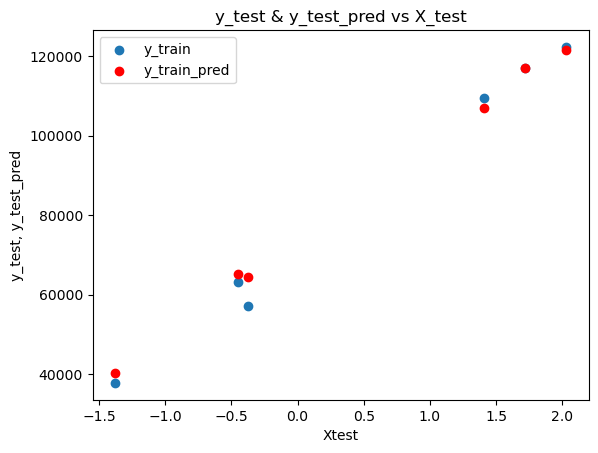

In [12]:

# ! Là aussi on triche un peu là

fig, ax = plt.subplots()
ax.set_title("y_test & y_test_pred vs X_test")
ax.set_xlabel("Xtest")
ax.set_ylabel("y_test, y_test_pred")
ax.scatter(X_test[:,3], y_test)
ax.scatter(X_test[:,3], y_test_pred, c="red")
_ = ax.legend(('y_train', 'y_train_pred'))

## Step 3 - Evaluate the model

In [13]:
# C'est bien X_train et y_train. 
# score() n'a pas besoin de y_train_pred car il peut les recalculer 
# Il a déjà en mémoire les 'a' et 'b' dont il a besoin 

# TODO : R² adjust
# Print R² scores
print(f"R² score on training set : {regressor.score(X_train, y_train):.3f}")
print(f"R² score on test set     : {regressor.score(X_test, y_test):.3f}")

R² score on training set : 0.947
R² score on test set     : 0.989


* $R^2$ close to 1 means good performance 
* $R^2_{train}$ > $R^2_{test}$ means overfitting 
* $R^2_{train}$ < $R^2_{test}$ means underfitting 

### Remarques
1. Si on est en overfitting on peut : simplifier le modèle, lui imposer des contraintes (Ridge, Lasso, ElasticNet), plus de données
2. Tester d'autres modèles
  * LinearRegression
  * DecisionTreeRegressor
  * Validation croisée avec K-fold cross-validation. cross_val_score()
  * RandomForestRegressor(). Ensemble learning.
  * Differents SVM (kernel linear par exemple)


## Step 4 - Features importance
If you want to interpret coefficients, make sure you `NORMALIZED` your data in the preprocessing part

In [14]:
# C'est juste pour montrer comment on retrouve la liste des noms des features du ou des OneHotEncoder

# On accède aux transformers du ColumnTransformer feature_encoder
print("All transformers are           : ", *feature_encoder.transformers_)

# On accède au OneHotEncoder
print("One Hot Encoder transformer is : ", feature_encoder.transformers_[0][1])

# On accède aux catégories du OneHotEncoder
# Une liste de 1 ou plusieurs tableaux
# Ici il y a 2 jeux de valeurs dans 2 sous tableaux
print("One Hot Encoder transformer is : ", *feature_encoder.transformers_[0][1].categories_)

# print(regressor.coef_.round(3))
# print(regressor.coef_.shape)

# print(regressor.coef_.squeeze().round(3))
# print(regressor.coef_.squeeze().shape)


All transformers are           :  ('cat', OneHotEncoder(), array([0], dtype=int64)) ('num', StandardScaler(), array([1], dtype=int64))
One Hot Encoder transformer is :  OneHotEncoder()
One Hot Encoder transformer is :  ['France' 'Germany' 'United-Kingdom']
[ -290.804 -2182.158  2472.962 23904.203]
(4,)
[ -290.804 -2182.158  2472.962 23904.203]
(4,)


In [17]:
# On veut construire un dataframe avec 
# une colonne pour les noms des features 
# une colonne avec les valeurs des coefs associés

# On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# numeric_features = une liste avec les indices des colonnes numériques
# .columns retourne le nom des colonnes 
numerical_column_names = X.iloc[:, numeric_features].columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : regressor.coef_.squeeze()  # faut passer un tableau 1D. squeeze remove axes of length one from ndarray
})
print(feature_importance.round(3))
print(f"Constant is            {regressor.intercept_:.3f}\n")

     feature_names  coefficients
0           France      -290.804
1          Germany     -2182.158
2   United-Kingdom      2472.962
3  YearsExperience     23904.203
Constant is            73498.282



$y=23904\times YearsExperience + 2472 \times UK - 2182 \times GE  -290\times FR + 73498$

In [ ]:
# Pour le fun
# Affiche l'équation avec les valeurs des variables
# Si elles changent on a pas besoin de 
# TODO : problème avec les -. Voir +-2182*Germany

from IPython.display import Latex

feature0 = feature_importance.loc[0, "feature_names"]
coef0 = feature_importance.loc[0, "coefficients"].round(2)

feature1 = feature_importance.loc[1, "feature_names"]
coef1 = feature_importance.loc[1, "coefficients"].round(2)

feature2 = feature_importance.loc[2, "feature_names"]
coef2 = feature_importance.loc[2, "coefficients"].round(2)

feature3 = feature_importance.loc[3, "feature_names"]
coef3 = feature_importance.loc[3, "coefficients"].round(2)

constant = regressor.intercept_.round(2)

Latex(f"""\\begin{{equation*}}
y = {{   {coef0}*{feature0}  + {coef1}*{feature1}  + {coef2}*{feature2}  + {coef3}*{feature3} + {constant}                         }}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

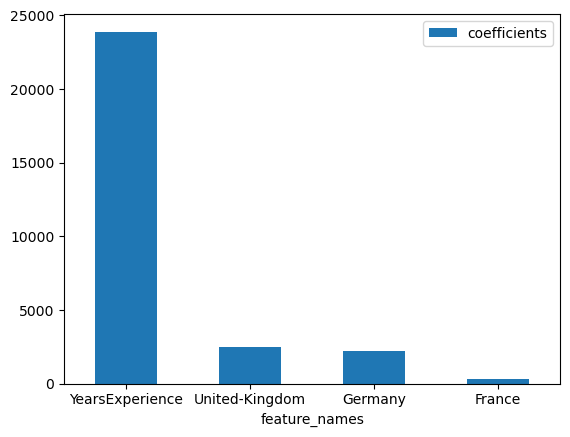

In [ ]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names") # , figsize=(16*.65, 9*.65)
_ = plt.xticks(rotation=0)


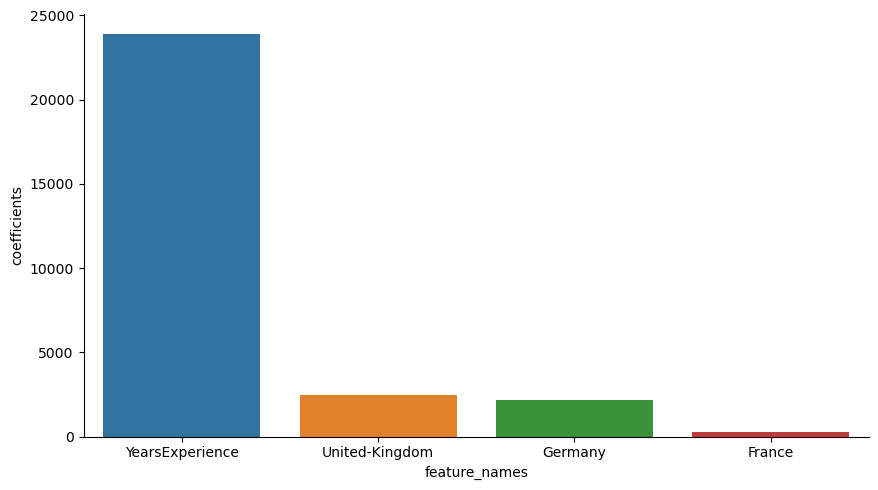

In [ ]:
sns.catplot(feature_importance.sort_values(by="coefficients", ascending=False), 
            x="feature_names", 
            y="coefficients", 
            kind="bar",
            hue="feature_names", 
            aspect=16/9,
            ); 